In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape

(1470, 35)

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#for extracting datatype specific columns
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [8]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x =='Yes' else 0)

In [9]:
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=['EducationField'])
df['EducationField'] = encoder.fit_transform(df['EducationField'], df['Attrition'])

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,0.146865,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,0.146865,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,0.134201,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,0.146865,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,0.135776,1,7,...,4,80,1,6,3,3,2,2,2,2


### ACCESSING THE PREPROCESSED DATA:
loding the pickle files

In [11]:
with open('X_train_sm.pickle', mode='rb') as file:
    X_train = pickle.load(file)

with open('y_train_sm.pickle', mode='rb') as file:
    y_train = pickle.load(file)

with open('X_test.pickle', mode = 'rb') as file:
    X_test = pickle.load(file)

with open('y_test.pickle', mode = 'rb') as file:
    y_test = pickle.load(file)

In [12]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0.149569,605,0.206278,21,3,0.146865,1,1938,4,...,3,80,1,29,2,2,1,0,0,0
1,45,0.149569,950,0.138398,28,3,0.242423,1,1546,4,...,4,80,1,8,3,3,5,4,0,3
2,40,0.149569,300,0.206278,26,3,0.220126,1,1066,3,...,2,80,1,8,3,2,7,7,7,5
3,36,0.080000,1434,0.206278,8,4,0.146865,1,789,1,...,2,80,0,10,1,3,10,7,0,9
4,25,0.249097,599,0.206278,24,1,0.146865,1,1273,3,...,4,80,0,1,4,3,1,0,1,0


In [13]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [14]:
X_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0.080000,635,0.206278,10,4,0.135776,1,592,2,...,4,80,0,10,3,2,10,3,9,7
1091,33,0.149569,575,0.138398,25,3,0.146865,1,1545,4,...,4,80,0,5,2,3,5,3,0,2
981,35,0.249097,662,0.206278,18,4,0.220126,1,1380,4,...,3,80,1,5,0,2,4,2,3,2
785,40,0.149569,1492,0.138398,20,4,0.242423,1,1092,1,...,4,80,1,14,6,3,11,10,11,1
1332,29,0.249097,459,0.138398,24,2,0.146865,1,1868,4,...,2,80,0,1,3,2,1,0,1,0


In [15]:
y_test.head()

442     0
1091    0
981     1
785     0
1332    1
Name: Attrition, dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_train, y_train)

1.0

In [20]:
model.score(X_test, y_test)

0.7585034013605442

#### The above results shows that the model is overfitting the data

### HYPERPARAMTER TUNING:-

In [21]:
from sklearn.model_selection import KFold , cross_validate, cross_val_score

In [24]:
kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,8,9,10]

for d in depths:

    model = DecisionTreeClassifier(random_state = 0, max_depth = d)
    cv_acc_results = cross_validate(model, X_train, y_train, cv = kfold,
                                   scoring = 'accuracy', return_train_score = True)

    mean_train_score = cv_acc_results['train_score'].mean()*100
    mean_val_score = cv_acc_results['test_score'].mean()*100

    print(f"K-fold for depth {d}")
    print(f"Accuracy Mean - \nTrain: for {mean_train_score}, Validation: {mean_val_score}")
    print('\n')

K-fold for depth 3
Accuracy Mean - 
Train: for 75.5622020687549, Validation: 65.09306260575295


K-fold for depth 4
Accuracy Mean - 
Train: for 80.39818694669911, Validation: 74.60365072040199


K-fold for depth 5
Accuracy Mean - 
Train: for 84.86297138658678, Validation: 76.22622160693227


K-fold for depth 6
Accuracy Mean - 
Train: for 87.97250891699247, Validation: 78.65969338050557


K-fold for depth 7
Accuracy Mean - 
Train: for 90.95824552285094, Validation: 81.03753268727888


K-fold for depth 8
Accuracy Mean - 
Train: for 93.69670907494067, Validation: 81.19161154694149


K-fold for depth 9
Accuracy Mean - 
Train: for 95.4398206547959, Validation: 81.95021278777624


K-fold for depth 10
Accuracy Mean - 
Train: for 97.04231848759208, Validation: 83.26539506742552




In [25]:
d = 4

In [27]:
model = DecisionTreeClassifier(max_depth = d)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
model.score(X_train, y_train)

0.8102226720647774

In [29]:
model.score(X_test, y_test)

0.7346938775510204

In [30]:
pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [33]:
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[191,  54],
       [ 24,  25]])

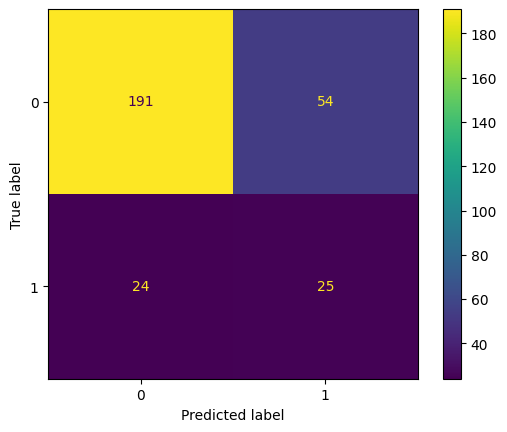

In [35]:
ConfusionMatrixDisplay(cnf_matrix).plot()
plt.show()

### VISUALIZING THE IMPORTANT FEATURES:-

In [36]:
importances = model.feature_importances_

In [37]:
indices = np.argsort(importances)[::-1]

In [38]:
names = [X_train.columns[i] for i in indices]

In [39]:
names

['JobRole',
 'JobSatisfaction',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'BusinessTravel',
 'MonthlyRate',
 'YearsSinceLastPromotion',
 'JobInvolvement',
 'PercentSalaryHike',
 'MonthlyIncome',
 'YearsWithCurrManager',
 'WorkLifeBalance',
 'TotalWorkingYears',
 'StandardHours',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'YearsAtCompany',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'Over18',
 'PerformanceRating',
 'JobLevel',
 'Gender',
 'HourlyRate',
 'EmployeeNumber',
 'EmployeeCount',
 'Education',
 'EducationField',
 'DistanceFromHome',
 'Department',
 'DailyRate',
 'Age']

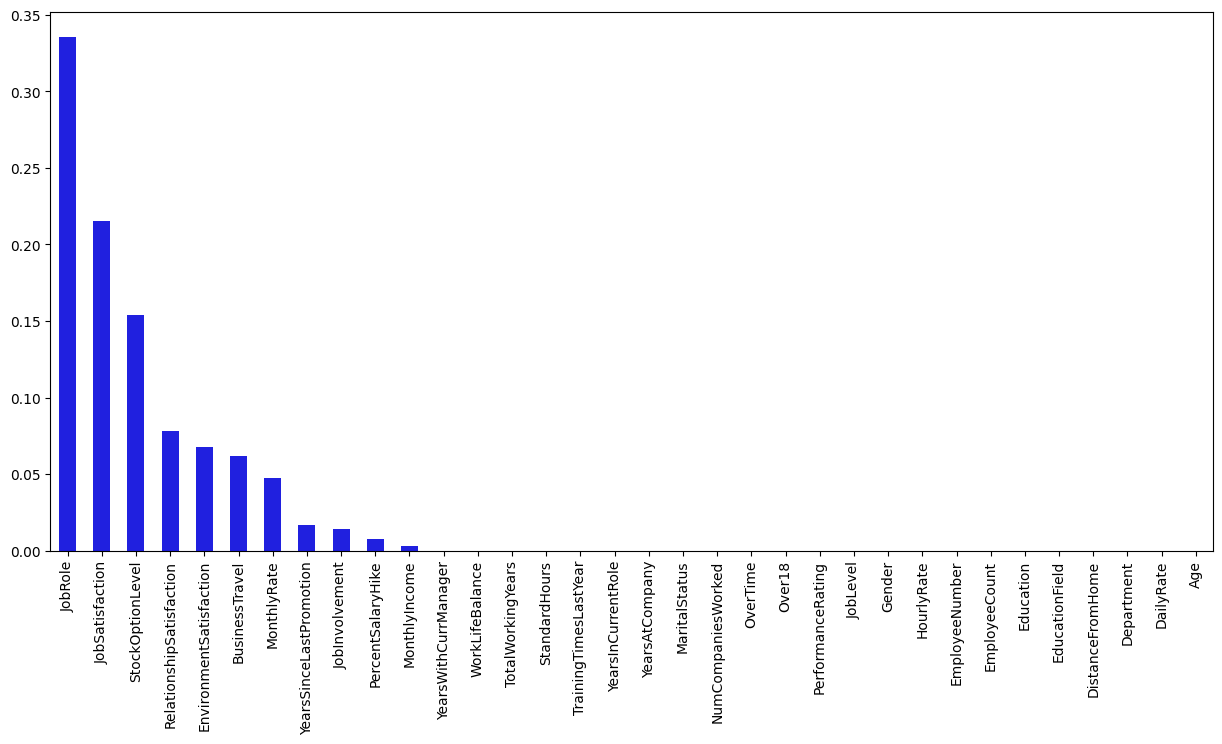

In [40]:
plt.figure(figsize=(15, 7))
sns.barplot(x = names, y = importances[indices], color='blue', width=0.5)
plt.xticks(rotation=90)
plt.show()